# Teste e documentação da solução

**pré-requisitos**
- pytorch
- scikit-learn
- imutils
- scipy
- numpy
- cv2


Obs.: implementado e testado com python 3.7.

## Módulos implementados

In [1]:
from src.utils.image_tools import PreprocessPipeline

_PreprocessPipeline_ tem um método *imgTransform* que recebe o diretório em que a imagem está e seu nome e retorna uma lista com 7 elementos, sendo os 7 caracteres recortados da imagem do captcha. Com essa lista é possível realizar a predição de cada caracter com o modelo treinado.

In [2]:
from src.utils.dataloader import Dataset

*Dataset* recebe um diretório e tem um método *load* que recebe o tamanho do batch e retorna um *data_loader* com os batches prontos e com as imagens transformadas em tensor prontas para serem utilizadas como entrada da rede convolucional.

In [3]:
from src.trainner import Trainner

*Trainner* recebe o modelo, otimizador, dataloader de treino e opcionalmente o dataloader de validação. 

Métodos:
- train: recebe número de épocas e realiza o treinamento salvando os pesos no diretório *model_weights*;
- evaluate: recebe um dataloader e cálcula diversas métricas, como f1-score e acurácia;
- predict: recebe um dataloader e retorna as uma lista com as classes preditas dos exemplos;
- load_weights: recebe o nome do arquivo com os pesos do modelo e do otimizador e carrega para continuar o treinamento se *continue_trainning* for **True** ou apenas carrega os pesos da rede se for **False**. O segundo caso é para *transfer learning*.

In [4]:
from src.model.cnn import CNN

*CNN* implementa a arquitetura da rede utilizada para resolver este problema. Consiste basicamente em 2 camadas de convolução e 2 densamente conectadas.

## Definindo os hiperparâmetros

In [5]:
# dados
batch_size_train = 64
batch_size_val = 1000

# otimizador
learning_rate = 0.02
momentum = 0.5

# modelo
n_epochs = 30

# apresentação
log_interval = 10

## Carregando os dados

Conjunto de treino:

In [6]:
train_dataset = Dataset('dataset/train')
                        
train_loader = train_dataset.load(batch_size=batch_size_train, shuffle=True)

Conjunto de validação:

In [7]:
val_dataset = Dataset('dataset/val')
                        
val_loader = val_dataset.load(batch_size=batch_size_val, shuffle=True)

## Inicializando o modelo e o otimizador

In [8]:
import torch.optim as optim

network = CNN()

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

## Treinando o modelo

In [9]:
trainner = Trainner(network, optimizer, train_loader, val_loader)

In [10]:
trainner.train(n_epochs, verbose=True, log_interval=10, save=False)

Train Epoch: 1 [0/4322 (0%)]	Loss: 3.208168
Train Epoch: 1 [640/4322 (15%)]	Loss: 3.239554
Train Epoch: 1 [1280/4322 (29%)]	Loss: 3.151405
Train Epoch: 1 [1920/4322 (44%)]	Loss: 3.191040
Train Epoch: 1 [2560/4322 (59%)]	Loss: 3.141653
Train Epoch: 1 [3200/4322 (74%)]	Loss: 2.919827
Train Epoch: 1 [3840/4322 (88%)]	Loss: 2.992876
---
	Epoch 1 trainning: 	Mean Loss: 3.088207


c:\users\lucasvilhagra\appdata\local\continuum\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\lucasvilhagra\appdata\local\continuum\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\lucasvilhagra\appdata\local\continuum\miniconda3\envs\pytorch\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	Epoch 1 validation: [1202] 	Mean Loss: 2.559870	Acc: 0.29	f-score: 0.25
---
Train Epoch: 2 [0/4322 (0%)]	Loss: 2.513119
Train Epoch: 2 [640/4322 (15%)]	Loss: 1.761023
Train Epoch: 2 [1280/4322 (29%)]	Loss: 1.137132
Train Epoch: 2 [1920/4322 (44%)]	Loss: 1.103928
Train Epoch: 2 [2560/4322 (59%)]	Loss: 1.157072
Train Epoch: 2 [3200/4322 (74%)]	Loss: 0.684832
Train Epoch: 2 [3840/4322 (88%)]	Loss: 0.522827
---
	Epoch 2 trainning: 	Mean Loss: 1.180295
	Epoch 2 validation: [1202] 	Mean Loss: 1.115533	Acc: 0.66	f-score: 0.64
---
Train Epoch: 3 [0/4322 (0%)]	Loss: 0.743181
Train Epoch: 3 [640/4322 (15%)]	Loss: 0.364877
Train Epoch: 3 [1280/4322 (29%)]	Loss: 0.578653
Train Epoch: 3 [1920/4322 (44%)]	Loss: 0.515566
Train Epoch: 3 [2560/4322 (59%)]	Loss: 0.456929
Train Epoch: 3 [3200/4322 (74%)]	Loss: 0.859736
Train Epoch: 3 [3840/4322 (88%)]	Loss: 0.433257
---
	Epoch 3 trainning: 	Mean Loss: 0.496903
	Epoch 3 validation: [1202] 	Mean Loss: 0.657205	Acc: 0.85	f-score: 0.85
---
Train Epoch: 4 [0

---
	Epoch 19 trainning: 	Mean Loss: 0.054681
	Epoch 19 validation: [1202] 	Mean Loss: 0.486926	Acc: 0.93	f-score: 0.93
---
Train Epoch: 20 [0/4322 (0%)]	Loss: 0.019349
Train Epoch: 20 [640/4322 (15%)]	Loss: 0.028275
Train Epoch: 20 [1280/4322 (29%)]	Loss: 0.025884
Train Epoch: 20 [1920/4322 (44%)]	Loss: 0.038796
Train Epoch: 20 [2560/4322 (59%)]	Loss: 0.054937
Train Epoch: 20 [3200/4322 (74%)]	Loss: 0.090035
Train Epoch: 20 [3840/4322 (88%)]	Loss: 0.066655
---
	Epoch 20 trainning: 	Mean Loss: 0.051508
	Epoch 20 validation: [1202] 	Mean Loss: 0.471354	Acc: 0.93	f-score: 0.93
---
Train Epoch: 21 [0/4322 (0%)]	Loss: 0.028487
Train Epoch: 21 [640/4322 (15%)]	Loss: 0.051772
Train Epoch: 21 [1280/4322 (29%)]	Loss: 0.100823
Train Epoch: 21 [1920/4322 (44%)]	Loss: 0.009581
Train Epoch: 21 [2560/4322 (59%)]	Loss: 0.063295
Train Epoch: 21 [3200/4322 (74%)]	Loss: 0.044066
Train Epoch: 21 [3840/4322 (88%)]	Loss: 0.013399
---
	Epoch 21 trainning: 	Mean Loss: 0.040121
	Epoch 21 validation: [1202] 	

## Plotando os resultados do treinamento

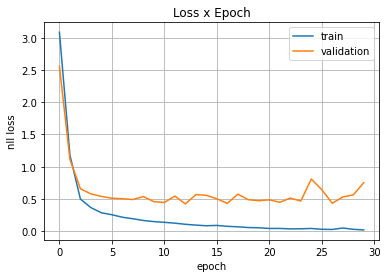

In [15]:
import matplotlib.pyplot as plt

plt.plot(trainner.train_loss_hist)
plt.plot(trainner.val_loss_hist)
plt.title('Loss x Epoch')
plt.ylabel('nll loss')
plt.grid(True)
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

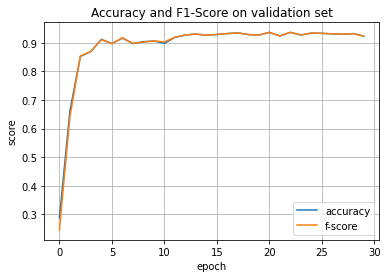

In [159]:
plt.plot(trainner.val_acc_hist)
plt.plot(trainner.val_fscore_hist)
plt.title('Accuracy and F1-Score on validation set')
plt.ylabel('score')
plt.grid(True)
plt.xlabel('epoch')
plt.legend(['accuracy', 'f-score'], loc='lower right')

O modelo selecionado foi o da época 24, em que a acurácia na validação chegou a 94 \%.

## Usando o modelo para predizer os captchas

In [150]:
from skimage import io
import numpy as np
import torch
import os

def hamming_distance(str1, str2):
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

def predict_from_dir(dir):
    segmentation_error = []
    classification_error = []
    correct = 0
    
    # carrega uma lista com os nomes das imagens
    test_imgs = os.listdir(dir)
    
    # carrega os pesos da rede e muda para modo de teste
    pretrained_dict = torch.load('C:/Users/lucasvilhagra/PycharmProjects/SimpleCaptchaSolver/model_weights/best_model.pth')
    network.load_state_dict(pretrained_dict)
    network.eval()
    
    preprocess = PreprocessPipeline()
    
    for img_name in test_imgs:
        # pré-processa e separa os caracteres das imagens
        try:
            segmented_chars = preprocess.imgTransform(dir, imgName=img_name)
        except Exception as exc:
            if exc.args[0] == 'CropError':
                print("Segmentation error: {}\n".format(img_name))
                segmentation_error.append(img_name)
                continue
                
        # converte os rótulos para int para representar as classes
        target = [ord(char)-65 for char in img_name.split('.')[0]]

        # converte array para tensor
        segmented_chars_tensor = torch.from_numpy(np.expand_dims(np.array(segmented_chars, dtype=np.float32), axis=1))

        # realiza a predição
        pred = network(segmented_chars_tensor).data.max(1)[1].data.cpu().tolist()

        # se ocorreu erro de predição, mostra o correto, predito e quantos caracteres errados
        if pred != target:
            captcha_pred = ''.join([chr(p+65) for p in pred])
            captcha_true = ''.join([chr(t+65) for t in target])
            
            print("Classification error: \n\tcorrect: {}\tpredicted: {}\thamming distance: {}\n".format(img_name.split('.')[0], captcha_pred, hamming_distance(captcha_pred, captcha_true)))
            classification_error.append((img_name, hamming_distance(captcha_pred, captcha_true)))
            
        else:
            correct += 1
            
    return correct, classification_error, segmentation_error

In [151]:
dir = 'C:/Users/lucasvilhagra/PycharmProjects/SimpleCaptchaSolver/test_captchas'

correct, class_error, seg_error = predict_from_dir(dir)

Os caracteres não puderam ser separados corretamente.
Segmentation error: AVIGKXC.jpeg

Classification error: 
	correct: AVTINMQ	predicted: AXTINMQ	hamming distance: 1

Classification error: 
	correct: BHBEUDO	predicted: BHBEUDD	hamming distance: 1

Classification error: 
	correct: CQSAYLP	predicted: CBSAYLP	hamming distance: 1

Classification error: 
	correct: CULOCGA	predicted: CULQCGA	hamming distance: 1

Classification error: 
	correct: CVDOTXW	predicted: FNDOTXW	hamming distance: 2

Os caracteres não puderam ser separados corretamente.
Segmentation error: DAMJUMH.jpeg

Classification error: 
	correct: EOUFNAT	predicted: EOUSNAT	hamming distance: 1

Classification error: 
	correct: EQGWVLX	predicted: EQCWVLI	hamming distance: 2

Os caracteres não puderam ser separados corretamente.
Segmentation error: ERKJDCB.jpeg

Classification error: 
	correct: GNWLBOA	predicted: GNWLBQA	hamming distance: 1

Os caracteres não puderam ser separados corretamente.
Segmentation error: GQIAYLX.jpeg



**Resultado**

Primeiramente, vamos visualizar os números frios:

In [157]:
print('Taxa de acerto: \t\t\t{:.2f} %'.format(100*correct/(correct+len(class_error)+len(seg_error))))
print('Taxa de erro de classificação: \t\t{:.2f} %'.format(100*len(class_error)/(correct+len(class_error)+len(seg_error))))
print('Taxa de erro por segmentação: \t\t{:.2f} %'.format(100*len(seg_error)/(correct+len(class_error)+len(seg_error))))

Taxa de acerto: 			62.35 %
Taxa de erro de classificação: 		24.71 %
Taxa de erro por segmentação: 		12.94 %


Pensando no problema, há a possibilidade de solicitar outro captcha em caso de dúvida. Com isso, podemos excluir o erro por segmentação, pois caso o pré-processamento não consiga segmentar os caracteres, uma outra imagem pode ser solicitada. Desta forma, a taxa de acerto neste conjunto de teste pode ser considerada como sendo:

In [158]:
print('Taxa de acerto excluindo erro por segmentação: {:.2f} %'.format(100*correct/(correct+len(class_error))))

Taxa de acerto excluindo erro por segmentação: 71.62 %


Agora vamos analisar o quão "feio" o modelo errou nos captchas classificados incorretamente.

In [169]:
qtd_error = [0] * 7

for i in class_error:
    qtd_error[i[1]-1]+= 1 

Dos 21 erros (28.38 \%) na classificação dos captchas:

In [171]:
for i, e in enumerate(qtd_error):
    print('Erro por {} caractere(s): {:.2f} %'.format(i+1, 100*e/sum(qtd_error)))

Erro por 1 caractere(s): 61.90 %
Erro por 2 caractere(s): 23.81 %
Erro por 3 caractere(s): 9.52 %
Erro por 4 caractere(s): 0.00 %
Erro por 5 caractere(s): 0.00 %
Erro por 6 caractere(s): 4.76 %
Erro por 7 caractere(s): 0.00 %


## Visualizando os erros

### Erros de classificação

In [188]:
import matplotlib.pyplot as plt

def plot(segmented_chars, img_name, n_errors):
    for i, char in enumerate(segmented_chars):
        plt.subplot(1, 7, i+1)
        plt.axis('off')
        io.imshow(char)
    plt.show()
    print('Número de erros {}'.format(n_errors))
    plt.subplot(1, 1, 1)
    plt.axis('off')
    io.imshow(img_name)
    plt.show()

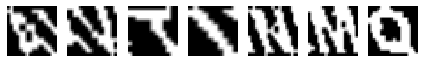

Número de erros 1


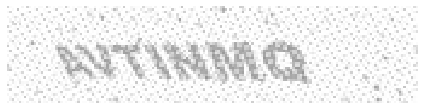

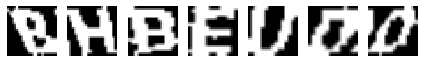

Número de erros 1


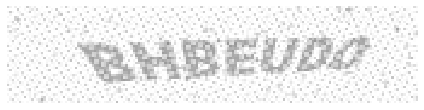

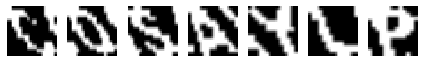

Número de erros 1


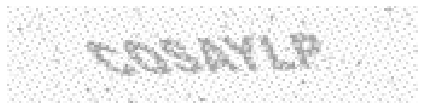

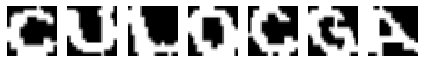

Número de erros 1


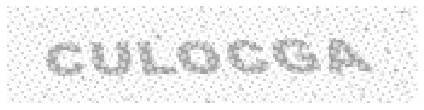

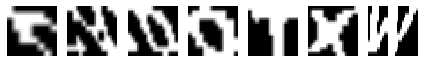

Número de erros 2


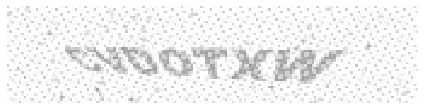

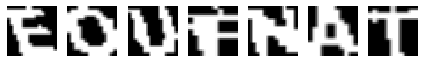

Número de erros 1


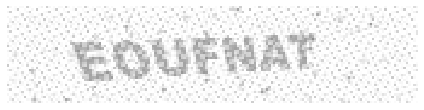

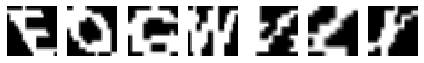

Número de erros 2


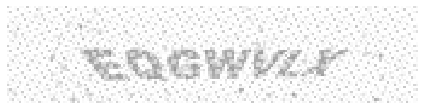

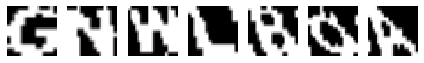

Número de erros 1


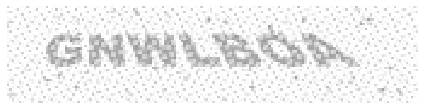

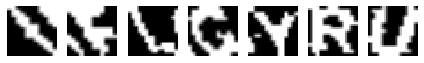

Número de erros 1


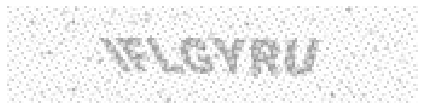

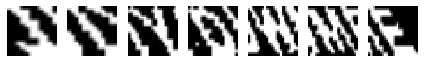

Número de erros 2


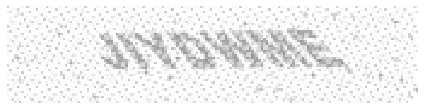

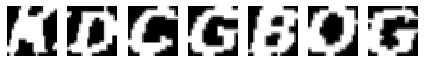

Número de erros 2


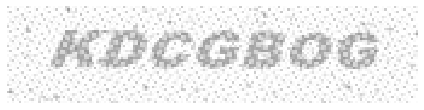

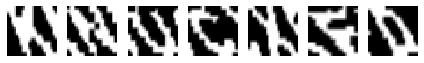

Número de erros 1


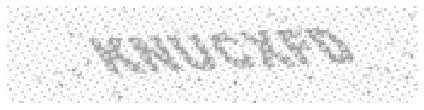

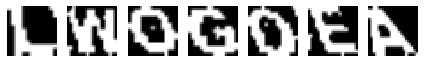

Número de erros 1


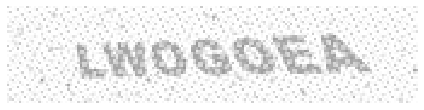

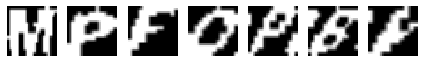

Número de erros 1


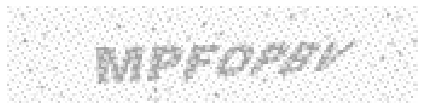

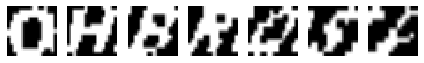

Número de erros 3


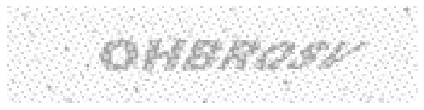

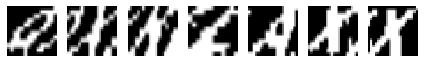

Número de erros 1


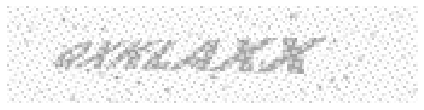

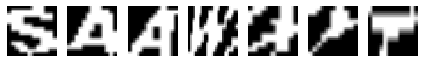

Número de erros 3


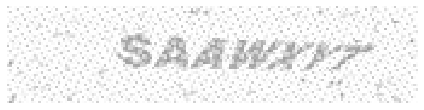

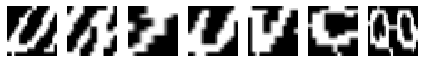

Número de erros 6


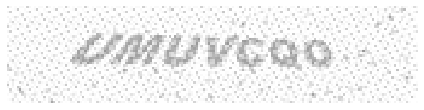

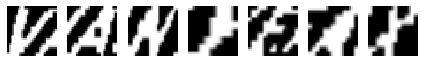

Número de erros 2


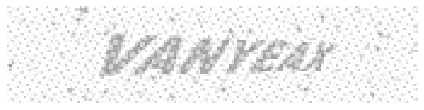

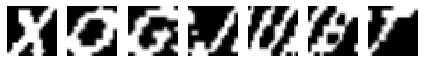

Número de erros 1


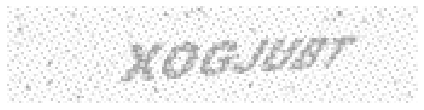

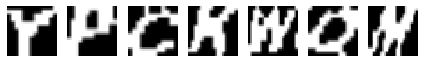

Número de erros 1


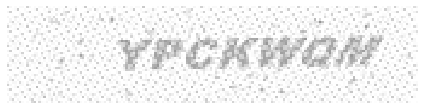

In [189]:
for e in class_error:
    img_name = e[0]
    n_errors = e[1]
    segmented_chars = preprocess.imgTransform(dir, imgName=img_name)
    
    plot(segmented_chars, img_name, n_errors)

### Erros de segmentação

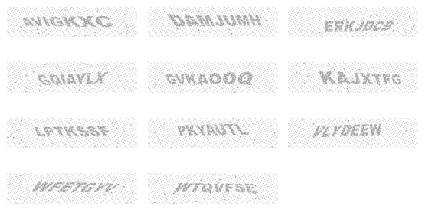

In [197]:
for i, img_name in enumerate(seg_error):
    plt.subplot(5, 3, i+1)
    plt.axis('off')
    io.imshow(img_name)
plt.show()

## Notas para o futuro

- É provável que os erros de segmentação ocorreram devido à proximidade das letras. Em um trabalho futuro será necessário tentar estimar o tamanho de cada letra para conseguir tratar esses casos.
- Grande parte dos erros ocorrem devido ao pré-processamento.
- É provável que um dos erros de classificação (YPCKWOM), seja na verdade um erro de rotulação, pois realmente não dá pra ter certeza se a imagem apresenta um O ou um Q.
- Excluindo os captchas que não podem ser segmentados corretamente, a taxa de acerto (71.62 \%) fica acima do esperado. A taxa de acerto média esperada para os 7 caracteres é de cerca de 65 \%, dado que a média de acerto dos caracteres individualmente é de 94 \%.